<a href="https://colab.research.google.com/github/AnteroGabriel/General-rep/blob/main/ThreePhaseSinusoidalWinding_5thNegative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b> Rotating mmf of Ideal Three-Phase Sinusoidally Distributed Winding with 5th-Negative-Sequence Harmonic Excitation</h1></b>

Dr. Bingsen Wang

4/18/2023
</center>

#Introduction

When the single-phase concentrated winding of $N$ turns conducts current $i$, the magnetomotive force (MMF) is 
$$\mathcal{F} = Ni\tag{1}$$
Based on ampere's law and the assumption of infinite permeability of the magnetic material of the stator and rotor core, we have
$$2H_gl_g = Ni\tag{2}$$
where $H_g$ is the magnetic field intensity in the air gap; $l_g$ is the air gap length. 

Let the winding axis be located at the spatial angle $\theta=0$. It is customary to assign positive polarity to the field intensity if it results in the magnetic flux density pointing from the rotor to stator and vice versa. The air-gap field intensity can be explicitly expressed as a function of the spatial angle
$$H_g(\theta)= \left\{\begin{array}{rl}
\frac{Ni}{2l_g}&\text{if $-{\pi\over2}<\theta < {\pi\over2}$}\\ 
-\frac{Ni}{2l_g}&\text{otherwise}
\end{array}\right.\tag{3}$$
Since the shape of $H_g(\theta)$ is determined by the winding configuration, it would give more clear understanding if the *winding function* $N_w(\theta)$ is defined as
$$N_w(\theta)= \left\{\begin{array}{rl}
N&\text{if $-{\pi\over2}<\theta < {\pi\over2}$}\\ 
-N&\text{otherwise}
\end{array}\right.\tag{4}$$
where $N$ is the nuber of turns of the winding. In general, the winding function would be staircase function that is similar to the multilevel waveform shape of a power converter if the winding is discretely distributed, which is pratically always the case. For the idealized case, the sinusoidally (and continuously) distributed winding will result in a smooth sinusoidal winding function. 

In some reference book, such as "Vector Control and Dynamics of AC Drives" by Prof. D. W. Novotny and Prof. T. A. Lipo, the concept of *winding density function* $n_w(\theta)$ is also defined. The integration of the winding density function yields the winding functions, i.e.:
$$N_w(\theta) = \int n_w(\theta)d\theta \tag{5}$$

The air-gap field $H_g(\theta)$ is related to the newly defined winding function $N_w(\theta)$ by
$$H_g(\theta) = \frac{1}{2l_g}N_w(\theta)i \tag{6}$$

#Ideal Sinusoidally Distributed Winding

## Continuously Distributed Winding
The idealized sinusoidally distributed winding is continuous with the winding density function given by
$$n_w(\theta) = N_m \sin\theta\tag{7}$$
where $N_m$ is the amplitude of the winding density function and $N_m = {N\over2}$ with $N$ being the total number of turns of the winding.

The winding function is 
$$N_w(\theta) = \int_{\theta}^{\pi-\theta}n_w(\zeta)d\zeta\tag{8}$$

Substituting (7) into (8) yiels
$$N_w(\theta) = 2N_m\cos\theta = N\cos\theta\tag{9}$$
At $\theta = 0$, the winding function reaches it peak value, which means the flux that passes through $\theta=0,\pi$ would link all $N$ turns of the winding due to the geometric symmetry.

#Python Code
The Python code animates the air-gap field of the single-phase sinusoidally and discretely distributed winding excited by a sinusoidal current. The conductor sizing for each slot is based on equation (12). Since the purpose of the illustration is focused on the concept, the total number of turns of the winding is normalized to 1.

This animation generates the field for 48 slots, 4-pole winding in 2 fundamental cycles.

<ipython-input-9-211ee9b86ddf>:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


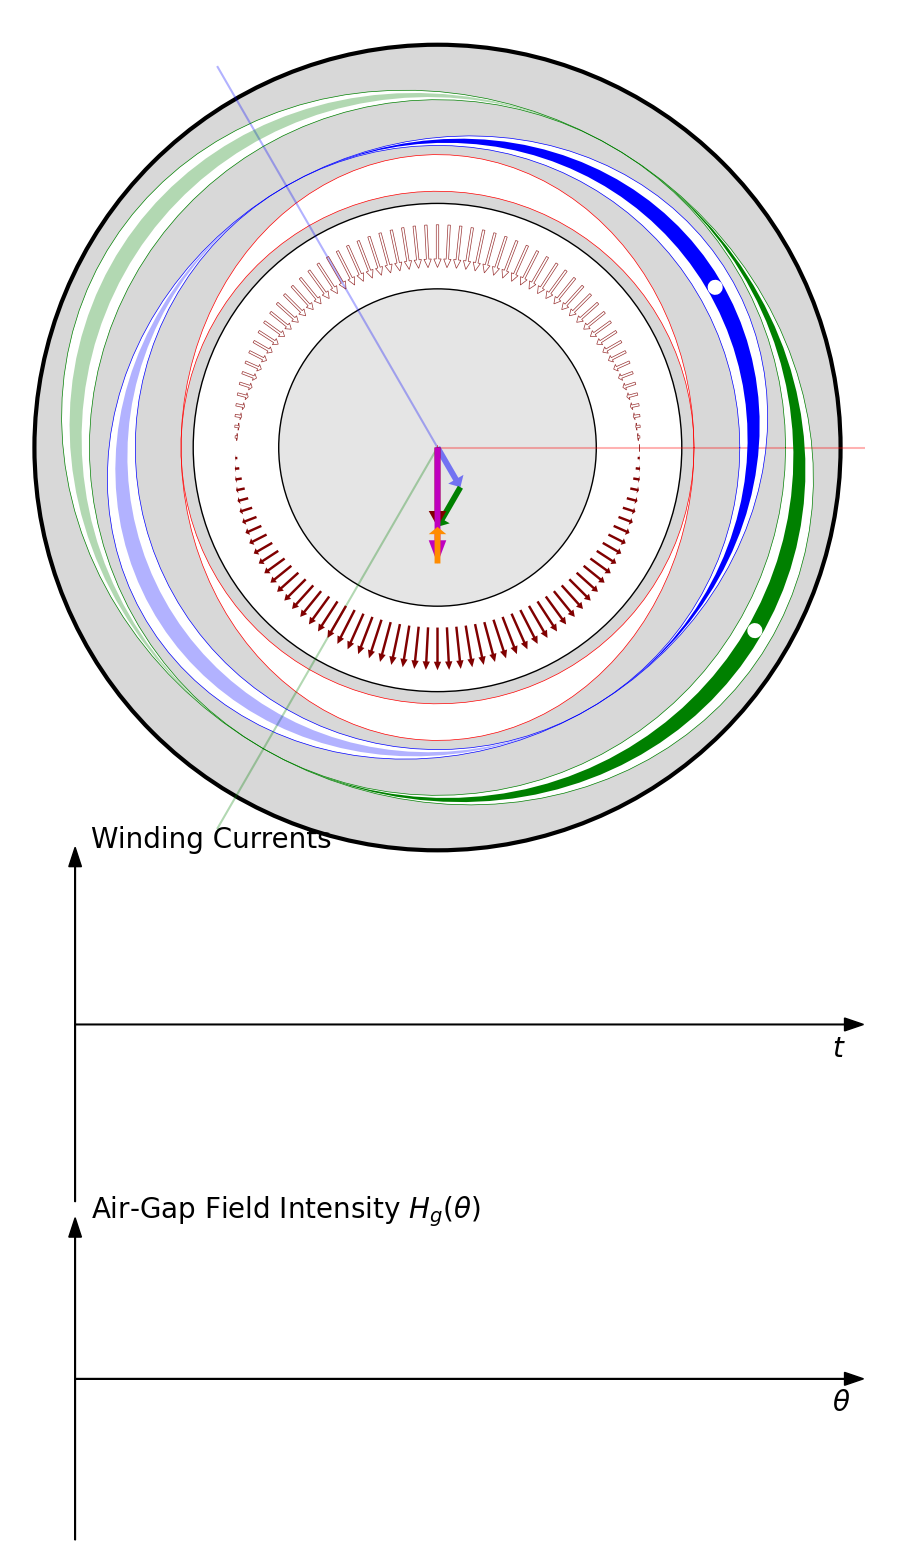

In [ ]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,heaviside,angle,sqrt,real,imag
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.text import TextPath
from matplotlib.path import Path
from matplotlib.patches import PathPatch,Arrow,Circle,Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import animation,rc,transforms
rc('animation', html='jshtml')

# draw the stator and rotor 
def drawStatorRotor(ax,rs_o,rs_i,rr_o):
  pts=[]
  pts.append(Circle((0,0),rs_o)) #stator outer circle
  pts.append(Circle((0,0),rs_i)) #stator inner circle
  pts.append(Circle((0,0),rr_o)) #rotor outer circle
  pc = PatchCollection(pts,fc=[to_rgba('grey',0.3),'w',to_rgba('grey',0.2)],
                       ec=['k','k','k'],lw=[3,1,1])
  ax.add_collection(pc)
  return 

# winding density function
def nw(theta):
  return sin(theta)

# draw stator winding (without current) with winding axis at angle theta
def drawSatorWinding(ax,rs_o,rs_i,cs,theta,Np,color): 
  """ 
  ax: the axis to which the winding will be plotted
  cs: the conductor size
  rs_o: radius of stator-outer
  rs_i: radius of stator-inner
  theta: the angle of the winding axis, at theta=0, 
          the winding axis point to 3 o'clock
  """
  theta_pph = 360/(Np/2) # pitch angle of per pole phase
  tt=linspace(0,2*pi,100)
  ci = (rs_i+0.05)*exp(1j*tt) # conductor inner boundary
  co = ci+nw(tt)*cs*1j # conductor outer boundary
  for kk in range(int(Np/2)):
    rot = transforms.Affine2D().rotate_deg_around(0,0,theta+kk*theta_pph) + ax.transData
    ax.plot(real(ci),imag(ci),lw=0.5,color=color) #inner boundary of conductor
    ax.plot(real(co),imag(co),lw=0.5,color=color,transform=rot) #outer boundary of conductor
    ax.fill_between(real(ci),imag(ci),imag(co),fc='w',transform=rot) # fill conductor area
    ax.plot(tt/(2*pi)*(rs_o+0.15),tt*0,color=to_rgba(color,0.3),lw=1.5,transform=rot) # winding axis
  return

# draw winding current direction
def drawWindingCurrent(ax,i,cs,rs_i,theta,Np,color):
  """ 
  ax: the axis to which the winding will be plotted
  cs: the conductor size
  rs_i: radius of stator-inner
  theta: the angle of the winding axis, at theta=0, 
          the winding axis point to 3 o'clock
  """ 
  r2=cos(pi/2)
  colors=[to_rgba(color,0.3), color]
  x0_dot = 0
  y0_dot = rs_i+cs*0.5+0.05
  x0_cross = x0_dot
  y0_cross = -y0_dot
  vcs = cs*i*0.475 #variable current size
  theta_pph = 360/(Np/2) # pitch angle of per pole phase
  tt=linspace(0,2*pi,100)
  ci = (rs_i+0.05)*exp(1j*tt) + 1j*0.5*cs*nw(tt)*(1 - i) #current inner boundary
  co = (rs_i+0.05)*exp(1j*tt) + 1j*0.5*cs*nw(tt)*(1 + i) #current outer boundary
  for kk in range(int(Np/2)):
    pts=[]
    rot = transforms.Affine2D().rotate_deg_around(0,0,theta+kk*theta_pph) + ax.transData #rotation definition for filled area
    rot1 = transforms.Affine2D().rotate_deg_around(0,0,theta+kk*theta_pph+heaviside(-i,0)*360/Np) + ax.transData #rotation definition for current direction
    ax.fill_between(real(ci),imag(ci),imag(co),where=imag(co)>imag(ci),fc=colors[1],transform=rot) # fill conductor area
    ax.fill_between(real(ci),imag(ci),imag(co),where=imag(co)<imag(ci),fc=colors[0],transform=rot) # fill conductor area
    pts.append(Circle((x0_dot,y0_dot),vcs))
    pts.append(PathPatch(Path([(x0_cross -r2*vcs,y0_cross-r2*vcs), (x0_cross+r2*vcs,y0_cross+r2*vcs),
                              (x0_cross-r2*vcs,y0_cross+r2*vcs), (x0_cross+r2*vcs,y0_cross-r2*vcs)],
                                  [Path.MOVETO,Path.LINETO,Path.MOVETO,Path.LINETO])))
    pc = PatchCollection(pts,fc=['w','w'],ec=['none','w'],lw=[0,5*i])
    pc.set_transform(rot1) #rotate 180+theta if i<0
    ax.add_collection(pc)
  return


# air gap field of one phase
def H1ph(i,theta_e,Np):
  return i*cos(theta_e/180*pi)


# air gap field of all three phases
def H3ph(i,theta_e,Np):
  Htot = 0
  for k in range(3):
    Htot = Htot+H1ph(i[k],theta_e - k*120,Np)
  return Htot/1.5

# draw flux of all three phases
def drawFlux(ax,i,rs_i,rr_o,Np,color):
  aw = 0.05
  lg = rs_i - rr_o # air gap length
  nfv = 120 #number of flux vectors 
  for k in range(nfv):
    la = lg*H3ph(i,k*360/nfv*(Np/2),Np)
    if la >0:
      pt = Arrow((rs_i+rr_o)*0.5-0.5*la,0,la,0,width=aw,fc=color,ec='none',lw=0)
    else:
      pt = Arrow((rs_i+rr_o)*0.5-0.5*la,0,la,0,width=aw,fc='none',ec=to_rgba(color,0.8),lw=0.5)
    pt.set_transform(transforms.Affine2D().rotate_deg_around(0,0, k*360/nfv)+ax.transData)
    ax.add_patch(pt)
  return


#draw space vectors
def drawVectors(ax,i,i1,i5,rr_o,Np,colors):
  la = rr_o
  aw=0.12
  colors_neg = []
  svs = [0]
  svtot = 0
  svtot1 = 0
  svtot5 = 0
  for k in range(3):
    colors_neg.append(to_rgba(colors[k],0.5))
    svtot = svtot + i[k]*exp(1j*k*2*pi/3)*la/1.5
    svtot1 = svtot1 + i1[k]*exp(1j*k*2*pi/3)*la/1.5
    svtot5 = svtot5 + i5[k]*exp(1j*k*2*pi/3)*la/1.5
    svs.append(svtot) 
  cl=[colors_neg,colors]
  for k in range(int(Np/2)):
    for kk in range(4):
      if kk<3:
        pt=Arrow(real(svs[kk]),imag(svs[kk]),real(svs[kk+1]-svs[kk]),imag(svs[kk+1]-svs[kk]),width=aw,fc=cl[int(heaviside(i[kk],0))][kk],ec='none',lw=0) #vector of phase a
        ax.add_patch(pt)
      else:
        pt=Arrow(0,0,real(svs[kk]),imag(svs[kk]),width=aw,fc=colors[-1],ec='none',lw=0) #vector of phase a
        ax.add_patch(pt)
    pt=Arrow(0,0,real(svtot1),imag(svtot1),width=aw,fc=colors[-3],ec='none',lw=0) #vector of fundamental total
    ax.add_patch(pt)
    pt=Arrow(real(svtot1),imag(svtot1),real(svtot5),imag(svtot5),width=aw,fc=colors[-2],ec='none',lw=0) #vector of 5th total
    # pt=Arrow(0,0,real(svtot5),imag(svtot5),width=aw,fc=colors[-2],ec='none',lw=0) #vector of 5th total
    ax.add_patch(pt)
  
  return

# the main function that draws the whole motor including the flux  
def drawMotor(ax,rs_o,rs_i,rr_o,cs,Np,colors):
  drawStatorRotor(ax,rs_o,rs_i,rr_o) # draw stator and rotor
  for k in range(3):
    drawSatorWinding(ax,rs_o,rs_i+cs*1.25*k,cs,k*120,Np,colors[k]) # drawing winding conductors with axes
  ax.set_xlim(-1.75, 1.75)
  ax.set_ylim(-1.75, 1.75)
  ax.axis('off')
  return

# the main function that draws the whole motor including the flux  
def drawFluxCurrent(ax,i,i1,i5,rs_o,rs_i,rr_o,cs,Np,colors):
  ax.clear() # clear axis before drawing
  for k in range(3):
    drawWindingCurrent(ax,i[k],cs,rs_i+cs*1.25*k,k*120,Np,colors[k])
  drawFlux(ax,i,rs_i,rr_o,Np,colors[-1])
  drawVectors(ax,i,i1,i5,rr_o,Np,colors)
  ax.set_xlim(-1.75, 1.75)
  ax.set_ylim(-1.75, 1.75)
  ax.axis('off')
  return

#prameters
Np = 2 #number of poles
rs_o=1.65 # stator outer radius
rs_i = 1 # stator inner radius
rr_o = 0.65 # rotor outer radius
cs= 0.15 # maximum conductor size
Nfpp=245
Nf = 1*Nfpp
t = linspace(0,1,Nfpp) #time series
theta = linspace(0,360,540)
cls=['r','b','g','m','darkorange','maroon'] #color list for winding and current,flux

it = []
it1 = [] #fundamental
it5 = [] #5th-order harmonic
itp = []
itn= []
for k in range(3):
  itt1 = 0.95*sin(Np*pi*t - k*2*pi/3)/1.3
  itt5 = 0.3*sin(5*Np*pi*t+ k*2*pi/3)/1.3
  itt = itt1 + itt5 #currents with 5th-order harmonic
  it.append(itt)
  it1.append(itt1)
  it5.append(itt5)
  itp.append(np.ma.masked_where(itt<=0,itt))
  itn.append(np.ma.masked_where(itt>0,itt))
it_sv = 2/3*(it[0]+it[1]*exp(1j*2*pi/3) + it[2]*exp(1j*4*pi/3))*rr_o #space vector 
fig = plt.figure(figsize=(9,16))
ax = plt.axes(xlim=(-0.1, 2.6), ylim=(-0.1, 4.7))
ax1 = fig.add_axes([0.0,0.45 , 0.95, 0.534]) # motor
ax2 = fig.add_axes([0.0,0.45 , 0.95, 0.534]) # drawing area for diagram
ax3 = fig.add_axes([0.0,0.45 , 0.95, 0.534]) # drawing area for diagram
ax3.set_xlim(-1.75, 1.75)
ax3.set_ylim(-1.75, 1.75)
fig.tight_layout()
ax.axis('off')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
drawMotor(ax1,rs_o,rs_i,rr_o,cs,Np,cls)

x0 = [0,0] # orgins of x-axis
y0 = [1.55,0.45] # origins of y-axis
xln = [2.5,2.5] # length of x-axis
yln = [1.1,1] # length of y-axis

# plot x,y axes
ax.arrow(x0[0], y0[0], xln[0], 0, width=0.002, head_width=0.04, ec='k', fc='k', length_includes_head=True)
ax.arrow(x0[0], y0[0]-yln[0]*0.5, 0, yln[0], width=0.002, head_width=0.04, ec='k', fc='k', length_includes_head=True)
ax.arrow(x0[1], y0[1], xln[1], 0, width=0.002, head_width=0.04, ec='k', fc='k', length_includes_head=True)
ax.arrow(x0[1], y0[1]-yln[1]*0.5, 0, yln[1], width=0.002, head_width=0.04, ec='k', fc='k', length_includes_head=True)

ax.text(x0[0]+0.05, y0[0]+yln[0]*0.5, 'Winding Currents',color='k', size = 20)
ax.text(x0[0]+xln[0]-0.1, y0[0] - 0.1, r'$t$', size = 20)
ax.text(x0[1]+0.05, y0[1]+yln[1]*0.5, r'Air-Gap Field Intensity $H_g(\theta)$',color='k', size = 20)
ax.text(x0[1]+xln[1]-0.1, y0[1] - 0.1, r'$\theta$', size = 20)

lines = [] #array containing all the line segments
for k in range(4):
  lines.append(ax.plot([], [], color=cls[k], lw=4)[0]) #postive half of phase-a current
  lines.append(ax.plot([], [], color=to_rgba(cls[k],0.35), lw=4)[0]) #negative half of phase-a current
lines.append(ax3.plot([],[],color=cls[-1],lw=1,ls='--')[0]) #space vector trajectory
lines.append(ax.plot([],[],color=cls[-3],lw=2,ls='--')[0]) # plot of fundamental mmf 
lines.append(ax.plot([],[],color=cls[-2],lw=2,ls='--')[0]) #plot of 5th-order mmf

def init(): #initialize the lines
  for k in range(11):
    lines[k].set_data([],[])
  return lines
# animation function.  This is called sequentially
def animate(i):
  drawFluxCurrent(ax2,[row[i] for row in it],[row[i] for row in it1],[row[i] for row in it5],rs_o,rs_i,rr_o,cs,Np,cls)
  Htheta = H3ph([row[i] for row in it],theta*(Np/2),Np) 
  Htheta1 = H3ph([row[i] for row in it1],theta*(Np/2),Np) #fundamental
  Htheta5 = H3ph([row[i] for row in it5],theta*(Np/2),Np) #5th-order
  Hthetap = np.ma.masked_where(Htheta<=0,Htheta)
  Hthetan = np.ma.masked_where(Htheta>0,Htheta)
  for k in range(3):
    lines[2*k].set_data(t[0:i+1]*xln[0]*.95+x0[0],y0[0] + itp[k][0:i+1]*yln[0]*0.5)
    lines[2*k+1].set_data(t[0:i+1]*xln[0]*.95+x0[0],y0[0] + itn[k][0:i+1]*yln[0]*0.5)
  lines[6].set_data(theta/360*xln[1]*.95+x0[1],y0[1] + Hthetap*yln[1]*0.45)
  lines[7].set_data(theta/360*xln[1]*.95+x0[1],y0[1] + Hthetan*yln[1]*0.45)
  lines[8].set_data(real(it_sv[0:i+1]),imag(it_sv[0:i+1]))
  lines[9].set_data(theta/360*xln[1]*.95+x0[1],y0[1] + Htheta1*yln[1]*0.45)
  lines[10].set_data(theta/360*xln[1]*.95+x0[1],y0[1] + Htheta5*yln[1]*0.45)
  return lines

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"ThreePhaseSinusoidal5thNegative.mp4" 
writervideo = animation.FFMpegWriter(fps=50) 
anim.save(fn, writer=writervideo,dpi = 200)

# debug
# sv = exp(1j*pi/3*0)*.95
# ilst=[]
# for k in range(3):
#   ilst.append(np.real(sv*exp(-1j*k*2*pi/3)))
# Np=2
# Htheta = H3ph(ilst,theta*Np/2,Np)
# Htp = np.ma.masked_where(Htheta<0,Htheta)
# Htn = np.ma.masked_where(Htheta>=0,Htheta)
# ax.plot(theta/360*xln[1]*.95+x0[1],y0[1] + Htp*yln[1]*0.5,lw=2,color=cls[0])
# ax.plot(theta/360*xln[1]*.95+x0[1],y0[1] + Htn*yln[1]*0.5,lw=2,color=cls[1])
# drawMotor(ax1,rs_o,rs_i,rr_o,cs,Np,cls)
# drawFluxCurrent(ax2,ilst,rs_o,rs_i,rr_o,cs,Np,cls)